In [1]:
import pandas as pd
df = pd.read_csv('./dataset/패션아이템/morpheme-result_Komoran.csv',
                 names=['TEXT'])
df

,TEXT
0,나이키
1,어
2,NaN
3,Made
4,NaN
...,...
95864,NaN
95865,NaN
95866,NaN
95867,남성


In [2]:
df['TEXT']

0         나이키 
1           어 
2          NaN
3        Made 
4          NaN
         ...  
95864      NaN
95865      NaN
95866      NaN
95867      남성 
95868      NaN
Name: TEXT, Length: 95869, dtype: object

In [3]:
texts = df['TEXT'].values.tolist()
print(texts[0])

나이키 


In [4]:
from krwordrank.hangle import normalize

texts = [normalize(str(text), english=True, number=True) for text in texts]

In [5]:
from krwordrank.word import KRWordRank

wordrank_extractor = KRWordRank(
    min_count=5,  # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length=10,  # 단어의 최대 길이
    verbose=True
)

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

scan vocabs ... 
num vocabs = 3171
done = 10


In [6]:
for word, r in sorted(keywords.items(), key=lambda x: x[1], reverse=True)[:30]:
    print('%8s:\t%.4f' % (word, r))

     아디다:	5.8787
    디스커버:	4.6177
      na:	4.3753
     블랙야:	3.5915
     뉴발란:	3.5441
      메이:	2.6992
     노스페:	2.4147
      NB:	2.2943
      Lm:	2.1933
      라푸:	2.1521
      JD:	2.1370
      나이:	2.0658
    트레이닝:	2.0395
      운동:	2.0373
      데상:	2.0032
      타이:	1.9695
     대한민:	1.9104
    마드리드:	1.8945
      유니:	1.8612
      롯데:	1.8384
    Tomm:	1.8169
      챔피:	1.7857
      베이:	1.7743
      co:	1.7641
      브랜:	1.7582
      UN:	1.7523
    파타고니:	1.7432
      TH:	1.7421
      아이:	1.7385
      발렌:	1.7380


In [7]:
stopwords = {}
passwords = {word: score for word, score in sorted(
    keywords.items(), key=lambda x: -x[1])[:300] if not (word in stopwords)}

In [8]:
from krwordrank.word import summarize_with_keywords

keywords = summarize_with_keywords(
    texts, min_count=5, max_length=10, beta=0.85, max_iter=10, stopwords=stopwords, verbose=True)
keywords = summarize_with_keywords(texts)  # with default arguments

scan vocabs ... 
num vocabs = 3171
done = 10


In [9]:
from wordcloud import WordCloud

# Set your font path
font_path = 'YOUR_FONT_DIR/truetype/nanum/NanumBarunGothic.ttf'

krwordrank_cloud = WordCloud(
    font_path=font_path,
    width=800,
    height=800,
    background_color="white"
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(passwords)

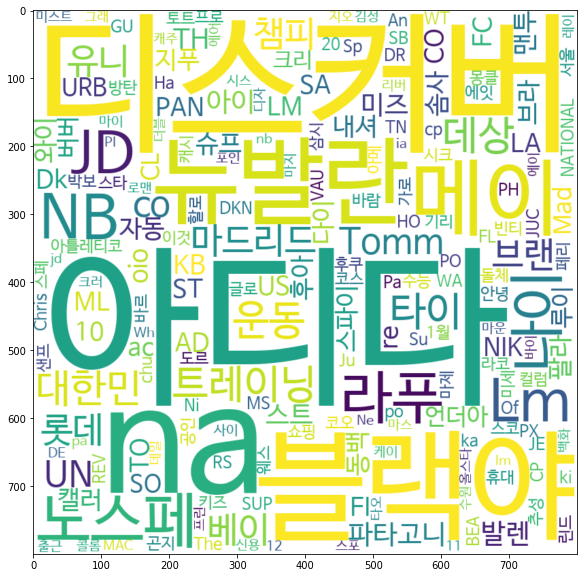

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 10))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()

In [11]:
# fig.savefig('./result_img/9_Komoran-2-KRWordRank_[ZIPUP].png')